In [1]:
import sys
import os

sys.path.append(os.path.abspath('D:/ExperimentsPhD/wasslsp'))

In [2]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

In [3]:
T = 100
d = 2
X = np.zeros((T,d))

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)
epsilon = np.random.normal(size=(T))

m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

t = 2
while t <= T-1 :
    X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
    X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
    X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
    t += 1

In [4]:
uniform_kernel = Kernel(T=T, bandwith=0.01, space_kernel="uniform", time_kernel="uniform")
uniform_weights_X = uniform_kernel.fit(X)
uniform_weights_ = uniform_weights_X.sum(axis=0)

In [5]:
epanechnikov_kernel = Kernel(T=T, bandwith=0.5, space_kernel="uniform", time_kernel="uniform")
epanechnikov_weights_X = epanechnikov_kernel.fit(X)
epanechnikov_weights_ = epanechnikov_weights_X.sum(axis=0)

In [6]:
gaussian_kernel = Kernel(T=T, bandwith=0.5, space_kernel="gaussian", time_kernel="gaussian")
gaussian_weights_X = gaussian_kernel.fit(X)
gaussian_weights_ = gaussian_weights_X.sum(axis=0)

In [7]:
silverman_kernel = Kernel(T=T, bandwith=0.01, space_kernel="silverman", time_kernel="silverman")
silverman_weights_X = silverman_kernel.fit(X)
silverman_weights_ = silverman_weights_X.sum(axis=0)

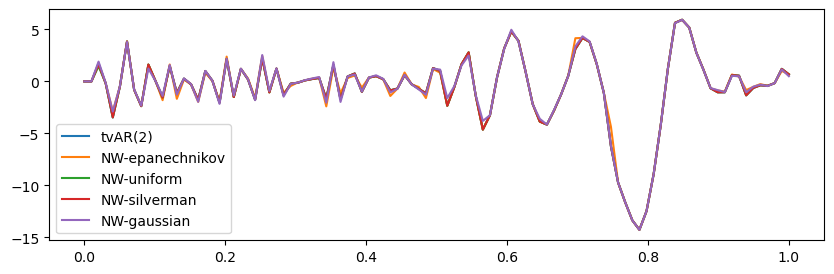

In [8]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(u_var, X_tvar_2, label='tvAR(2)')
# plt.plot(u_var, X_tvar_2_mean, label='tvAR(2)(mean)')
plt.plot(u_var, epanechnikov_weights_ * X_tvar_2, label='NW-epanechnikov')
plt.plot(u_var, uniform_weights_ * X_tvar_2, label='NW-uniform')
plt.plot(u_var, silverman_weights_ * X_tvar_2, label='NW-silverman')
plt.plot(u_var, gaussian_weights_ * X_tvar_2, label='NW-gaussian')
plt.legend()
plt.show()

In [9]:
gaussian_weights_

array([1.06048015, 1.07171767, 1.08273974, 0.78518642, 0.83835964,
       0.96673228, 0.98748677, 0.96943846, 0.98092752, 0.76874905,
       0.77798433, 0.90483968, 1.06558072, 1.13701881, 1.07064162,
       0.96931643, 1.11416282, 1.0182685 , 0.9998144 , 1.05499595,
       1.00818343, 0.90478794, 1.01541075, 1.19100935, 1.02784848,
       1.14638577, 0.87424892, 1.01753682, 1.11169621, 1.13192468,
       0.88077758, 1.21607005, 1.24084338, 1.26238713, 1.23404469,
       1.16218406, 1.14404843, 1.00802933, 0.87568735, 0.96979619,
       1.05036143, 1.15143737, 1.14889906, 1.22987275, 1.02871075,
       1.07060211, 1.06985427, 1.08842313, 1.12029456, 0.96424863,
       1.12937189, 0.68633113, 0.84189234, 0.93008475, 0.89487361,
       0.95812151, 0.81974845, 1.00065829, 1.02134139, 0.98495634,
       1.03551755, 0.98702976, 1.00355355, 1.01062463, 0.93141739,
       0.99970423, 0.9806648 , 0.99799939, 0.96403612, 1.08011661,
       1.03663071, 1.01172274, 1.01624742, 1.01102631, 0.99009

In [10]:
uniform_weights_

array([0.83333333, 1.33333333, 0.83333333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [11]:
epanechnikov_weights_

array([0.94722222, 0.94722222, 0.94722222, 1.        , 0.83333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.16666667, 1.1       , 1.5       , 0.7       ,
       1.08333333, 1.11111111, 0.85      , 0.66666667, 0.95833333,
       1.1       , 1.        , 1.        , 1.5       , 0.91666667,
       1.1       , 1.        , 1.        , 0.83333333, 2.03333333,
       0.75      , 0.94722222, 1.11388889, 1.11388889, 1.44722222,
       0.85      , 0.66666667, 0.7       , 0.75      , 0.6       ,
       1.03333333, 1.        , 0.94722222, 1.62777778, 1.        ,
       1.43333333, 1.08333333, 0.75      , 1.4       , 0.93333333,
       0.83333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.33333333,
       1.        , 1.        , 1.        , 1.        , 0.7    

In [12]:
X_tvar_2_norm = scp.stats.norm.cdf(X_tvar_2)


<Axes: >

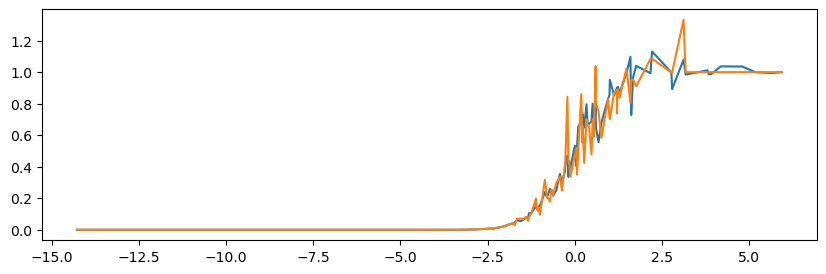

In [13]:
import seaborn as sns 
sns.lineplot(x=X_tvar_2, y=X_tvar_2_norm*gaussian_weights_)
sns.lineplot(x=X_tvar_2, y=X_tvar_2_norm*epanechnikov_weights_)

In [47]:
# X_

In [14]:
X_tvar_2_norm * gaussian_weights_

array([5.30240074e-01, 5.35858837e-01, 1.04002716e+00, 3.35388867e-01,
       2.23208474e-04, 3.03945214e-01, 9.87425373e-01, 2.05397896e-01,
       8.52684908e-03, 7.27918517e-01, 4.03421645e-01, 5.49511312e-02,
       9.91624078e-01, 1.50324968e-01, 6.47911555e-01, 3.78111441e-01,
       4.32297591e-02, 8.55164039e-01, 5.24288771e-01, 2.14590896e-02,
       9.92958323e-01, 5.99179607e-02, 8.99808645e-01, 6.82868052e-01,
       4.05266016e-02, 1.13101384e+00, 1.28105017e-01, 9.06889417e-01,
       1.04397924e-01, 4.69561953e-01, 3.95803137e-01, 6.55433630e-01,
       7.31809133e-01, 7.95887622e-01, 5.97083630e-02, 1.09764179e+00,
       4.83537477e-02, 6.88364445e-01, 6.80064670e-01, 1.53671204e-01,
       6.74697683e-01, 7.99841791e-01, 6.71261086e-01, 2.39639892e-01,
       2.53240898e-01, 7.75311076e-01, 4.19521347e-01, 2.59037862e-01,
       1.41615947e-01, 8.67923616e-01, 9.51028385e-01, 6.65121693e-03,
       2.51192158e-01, 8.84054774e-01, 8.92501591e-01, 7.94519531e-02,
      

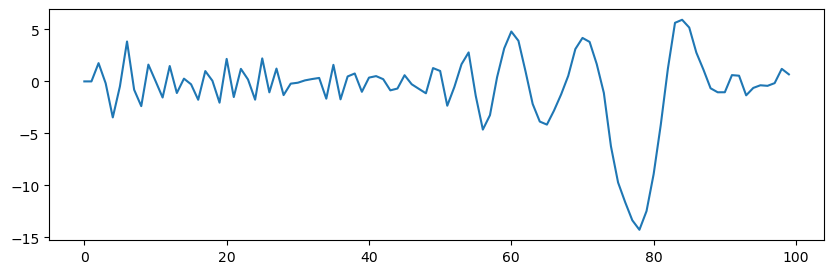

In [15]:
plt.plot(X_tvar_2)

In [16]:
T = 100
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

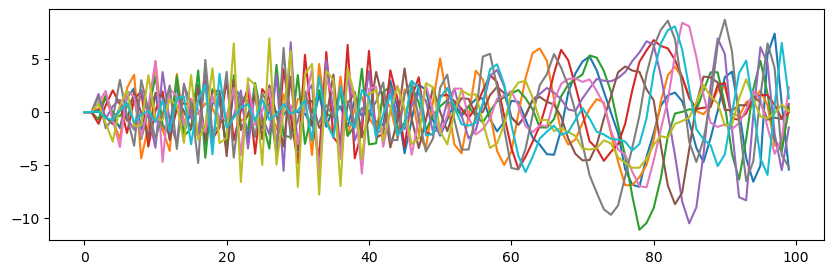

In [17]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [18]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])

In [20]:
t = [10, 20, 30, 40, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_30 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_30.append(X_tvar_2_replications[replication][29])

In [21]:
X_tvar_2_replications.shape

(20, 100)

In [22]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_30 = np.array(X_tvar_2_30)

In [56]:
# X_tvar_2_100

<Axes: >

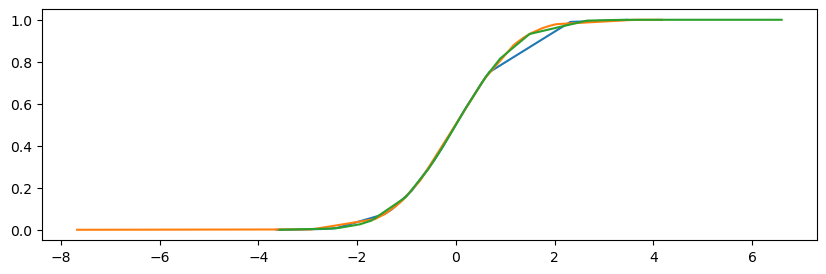

In [56]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_30 = scipy.stats.norm.cdf(X_tvar_2_30)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_30, y=norm_X_tvar_2_30)

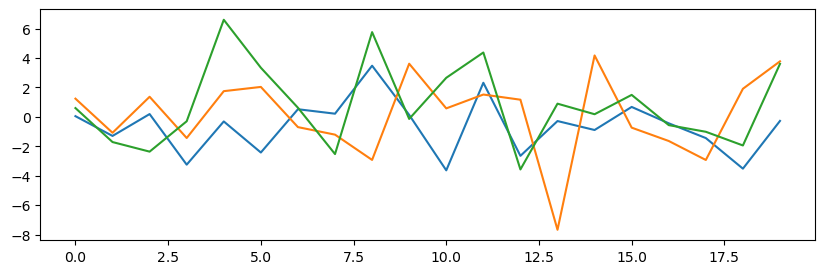

In [25]:
plt.plot(X_tvar_2_10)
plt.plot(X_tvar_2_20)
plt.plot(X_tvar_2_30)

bandwith = T**(0.4 / (2*(d+1))
epanechnikov_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gauss", time_kernel="mepanechnikov")

epanechnikov_weights = {}
epanechnikov_weights_ = {}
for replication in range(n_replications):
    epanechnikov_weights[str(replication)] = epanechnikov_kernel.fit(X_dict[str(replication)])
    epanechnikov_weights_[str(replication)] = epanechnikov_weights[str(replication)].sum(axis=0)

In [26]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])

In [27]:
print(type(epanechnikov_weights_))
print(epanechnikov_weights_)

<class 'numpy.ndarray'>
[0.94722222 0.94722222 0.94722222 1.         0.83333333 1.
 1.         1.         1.         1.         1.         1.16666667
 1.1        1.5        0.7        1.08333333 1.11111111 0.85
 0.66666667 0.95833333 1.1        1.         1.         1.5
 0.91666667 1.1        1.         1.         0.83333333 2.03333333
 0.75       0.94722222 1.11388889 1.11388889 1.44722222 0.85
 0.66666667 0.7        0.75       0.6        1.03333333 1.
 0.94722222 1.62777778 1.         1.43333333 1.08333333 0.75
 1.4        0.93333333 0.83333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.33333333 1.         1.
 1.         1.         0.7        1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.83333333
 0.93333333 1.1        0.83333333 0.625      0.83333333 0.7


In [273]:
epanechnikov_weights_[1].shape, epanechnikov_weights_[1].shape

((), ())

<Axes: >

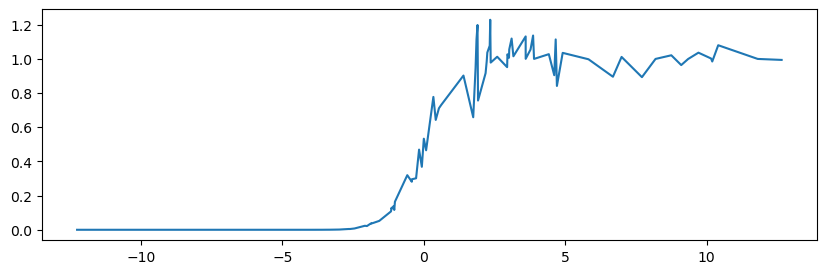

In [28]:
X_tvar_2_norm = scp.stats.norm.cdf(X_tvar_2)
sns.lineplot(x=X_tvar_2, y=X_tvar_2_norm*gaussian_weights_)

In [107]:
epanechnikov_weights_[0]

0.9666666666666667

In [109]:
epanechnikov_weights_[99]

1.0

In [110]:
weights_100 = {}
weights_200 = {}
weights_300 = {}
for replication in range(n_replications):
    weights_100[str(replication)] = epanechnikov_weights_[str(replication)][99]# 500 x 500
    weights_200[str(replication)] = epanechnikov_weights_[str(replication)][199]
    weights_300[str(replication)] = epanechnikov_weights_[str(replication)][299]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [43]:
weights_100['0'].shape

KeyError: '0'

In [44]:
plt.plot(weights_100['0'])

KeyError: '0'

In [45]:
X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm*weights_100['0'])

KeyError: '0'

In [111]:
X_tvar_2_100.shape

(10,)

In [112]:
X_tvar_2_100.shape

(10,)

In [114]:
weights_100['0'].shape

KeyError: 0

In [115]:
X_tvar_2_replications.shape

(10, 100)

In [116]:
weights_100['1'].shape

KeyError: '1'

<Axes: >

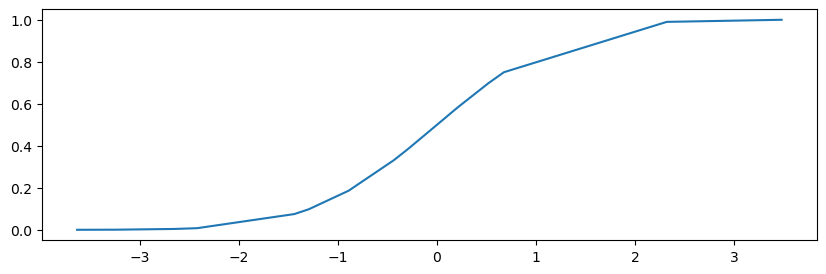

In [29]:
X_tvar_2_10_norm = scp.stats.norm.cdf(X_tvar_2_10)
cdf_10 = X_tvar_2_replications

sns.lineplot(x=X_tvar_2_10, y=X_tvar_2_10_norm)

In [304]:
X_tvar_2_replications[0].shape

(1000,)

In [305]:
for replication in range(1):
    print(replication)
    norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    sns.lineplot(x=X_tvar_2_replications[replication], y=norm*weights_100[str(replication)], label= str(replication))
    
X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm, label="200" )
plt.legend()
plt.show()

0


ValueError: operands could not be broadcast together with shapes (1000,) (100,100) 

In [ ]:
weights_100[str(replication)]

# Gausian weights 

In [30]:
T, n_replications

(100, 20)

In [31]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [32]:
weights_10 = {}
weights_20 = {}
weights_30 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_30[str(replication)] = gaussian_weights[str(replication)]


In [34]:
weights_10['0'].shape

(100, 100)

In [36]:
import pandas as pd
df_weights = pd.DataFrame(weights_10['0'])
df_weights.head(10)
#plt.plot(weights_10['1'])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.074369,0.074362,0.074341,0.074252,1.494503e-02,0.013425,8.256217e-03,1.600485e-03,1.246766e-04,6.010516e-05,...,1.427847e-04,1.531591e-06,2.215593e-12,4.767660e-08,8.896617e-10,4.778689e-27,1.073673e-29,2.515929e-24,4.051670e-36,1.708792e-24
1,0.074009,0.074016,0.074009,0.073934,1.488380e-02,0.013373,8.225429e-03,1.594811e-03,1.242576e-04,5.991422e-05,...,1.444775e-04,1.550035e-06,2.242689e-12,4.826858e-08,9.008748e-10,4.839812e-27,1.087607e-29,2.549052e-24,4.105770e-36,1.731928e-24
2,0.073650,0.073671,0.073678,0.073616,1.482261e-02,0.013320,8.194640e-03,1.589135e-03,1.238382e-04,5.972306e-05,...,1.461883e-04,1.568679e-06,2.270084e-12,4.886723e-08,9.122164e-10,4.901649e-27,1.101707e-29,2.582575e-24,4.160534e-36,1.755354e-24
3,0.073127,0.073161,0.073181,0.073242,1.577790e-02,0.013004,7.529852e-03,1.697626e-03,1.384432e-04,5.452678e-05,...,1.484883e-04,1.881403e-06,2.798520e-12,4.973233e-08,7.345116e-10,3.514926e-27,8.554630e-30,3.470138e-24,6.194068e-36,1.851357e-24
4,0.022936,0.022951,0.022962,0.024587,1.141343e-01,0.001944,6.478288e-05,1.302048e-02,9.700188e-03,3.909650e-07,...,5.506614e-05,1.532356e-03,9.335182e-09,2.725193e-08,7.664877e-15,1.467827e-34,1.183685e-35,3.633687e-19,1.188358e-28,5.922217e-24
5,0.020407,0.020424,0.020438,0.020071,1.925260e-03,0.113046,2.561375e-03,4.797962e-06,2.388755e-04,1.087078e-02,...,1.046972e-07,7.654809e-08,1.809737e-10,1.399808e-04,5.794802e-09,2.298712e-30,8.952967e-36,1.152227e-31,6.550601e-33,2.060240e-17
6,0.015699,0.015715,0.015728,0.014538,8.026316e-05,0.003204,1.414074e-01,1.924506e-05,2.215483e-08,2.948453e-04,...,1.116674e-04,3.551047e-11,1.634604e-18,6.795603e-10,3.278261e-05,1.411776e-18,1.890332e-22,3.823038e-30,3.649683e-47,4.081229e-28
7,0.003105,0.003109,0.003112,0.003344,1.646022e-02,0.000006,1.963686e-05,1.442862e-01,3.425399e-05,7.869985e-11,...,7.881829e-03,2.229994e-04,1.800527e-13,8.095347e-14,4.577281e-16,2.240391e-30,1.138595e-28,1.462249e-13,7.646686e-36,7.380390e-34
8,0.000425,0.000426,0.000426,0.000479,2.155038e-02,0.000536,3.972713e-08,6.019734e-05,2.535660e-01,1.178360e-07,...,3.083218e-09,1.119710e-02,4.494076e-04,9.152433e-06,1.318709e-19,8.153392e-46,3.504950e-48,2.794856e-22,5.556740e-19,4.659807e-17
9,0.000142,0.000142,0.000142,0.000131,6.006000e-07,0.016861,3.655827e-04,9.563408e-11,8.147994e-08,1.753330e-01,...,9.144793e-12,2.614724e-13,3.997389e-14,4.963951e-04,1.800991e-06,6.914791e-29,1.604175e-37,3.423050e-43,1.061855e-38,6.869611e-15


In [65]:
# df_weights.sum(axis=0)

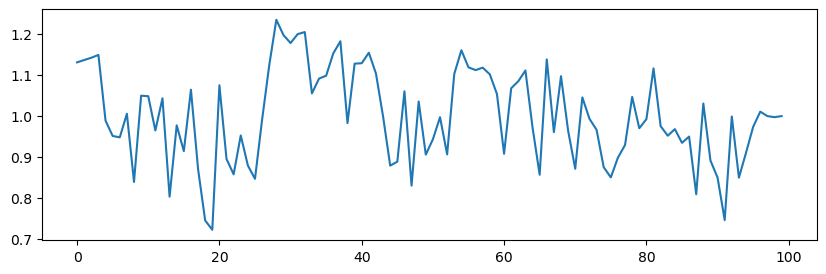

In [37]:
plt.plot(gaussian_weights_['0'])

In [39]:
replicated_NW_cdfs_10 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_10[str(replication)] = weights_10[str(replication)].sum(0)* X_tvar_2_replication_norm # [9] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [40]:
weights_10['0'].shape

(100, 100)

In [41]:
replicated_NW_cdfs_10['0'].shape

(100,)

<Axes: >

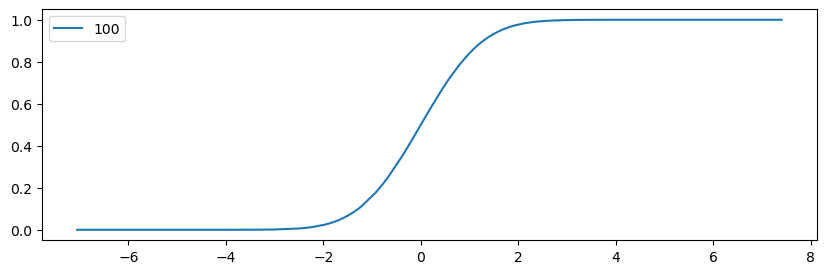

In [42]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [74]:
# replicated_NW_cdfs_100

In [43]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(20, 100) (20, 100)


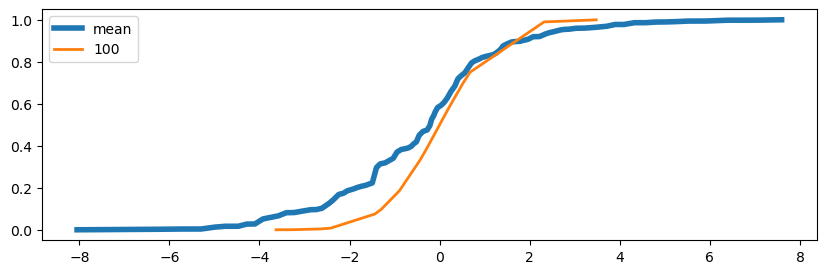

In [44]:
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
   y, x = eval_univariate(X_tvar_2_replications[replication], weights_10[str(replication)][9])
   x_rep[replication] = x
   y_rep[replication] = y
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_10_norm = scp.stats.norm.cdf(X_tvar_2_10)
sns.lineplot(x=X_tvar_2_10, y=X_tvar_2_10_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

In [50]:
y_mean_pi_NW_cdfs_10.shape

(100,)

In [49]:
x_mean_pi_NW_cdfs_10 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_10 = y_rep.mean(axis=0)

In [51]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_10, X_tvar_2_10_norm)

0.1765063550109074

In [ ]:
## T: 500 0.15288611513088618


In [52]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.9868308976105993

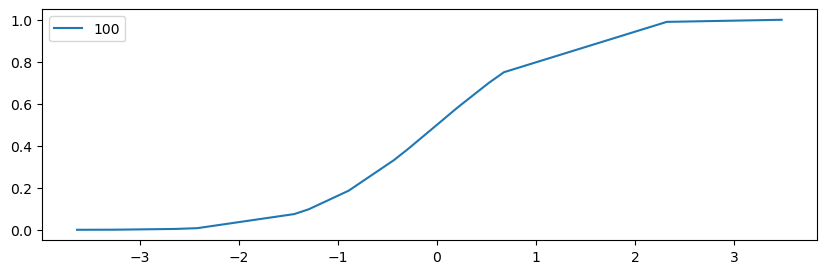

In [53]:

X_tvar_2_10_norm = scp.stats.norm.cdf(X_tvar_2_10)
sns.lineplot(x=X_tvar_2_10, y=X_tvar_2_10_norm, label=f"{T}" )
plt.legend()
plt.show()